In [23]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)
    print(results)
    break
    # print(results)
    # Draw landmark annotation on the image.
#     image.flags.writeable = True
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     mp_drawing.draw_landmarks(
#         image,
#         results.face_landmarks,
#         mp_holistic.FACEMESH_CONTOURS,
#         landmark_drawing_spec=None,
#         connection_drawing_spec=mp_drawing_styles
#         .get_default_face_mesh_contours_style())
#     mp_drawing.draw_landmarks(
#     image,
#     results.face_landmarks,
#     mp_holistic.FACEMESH_TESSELATION,  # Corrected attribute
#     landmark_drawing_spec=None,
#     connection_drawing_spec=mp_drawing_styles
#     .get_default_face_mesh_contours_style())

#     # Flip the image horizontally for a selfie-view display.
#     cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
#     if cv2.waitKey(5) & 0xFF == 27:
#       break
cap.release()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [26]:
import matplotlib as plt
# results.left_hand_landmarks
# plt.imshow(image)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
face = pd.DataFrame()
pose = pd.DataFrame()
left_hand = pd.DataFrame()
right_hand = pd.DataFrame()

if results.face_landmarks is not None:
    for i,point in enumerate(results.face_landmarks.landmark):
        face.loc[i,['x','y','z']] = point.x,point.y,point.z
# pd.DataFrame(face)
# pose = pd.DataFrame()
if results.pose_landmarks is not None:
    for i,point in enumerate(results.pose_landmarks.landmark):
        pose.loc[i,['x','y','z']] = point.x,point.y,point.z
# pd.DataFrame(face)
# left_hand = pd.DataFrame()
if results.left_hand_landmarks is not None:
    for i,point in enumerate(results.left_hand.landmark):
        left_hand.loc[i,['x','y','z']] = point.x,point.y,point.z
# pd.DataFrame(face)
# right_hand = pd.DataFrame()
if results.right_hand_landmarks is not None:
    for i,point in enumerate(results.face_landmarks.right_hand):
        right_hand.loc[i,['x','y','z']] = point.x,point.y,point.z
# pd.DataFrame(face)


AttributeError: type object 'SolutionOutputs' has no attribute 'pose'

<AxesSubplot:xlabel='x', ylabel='y'>

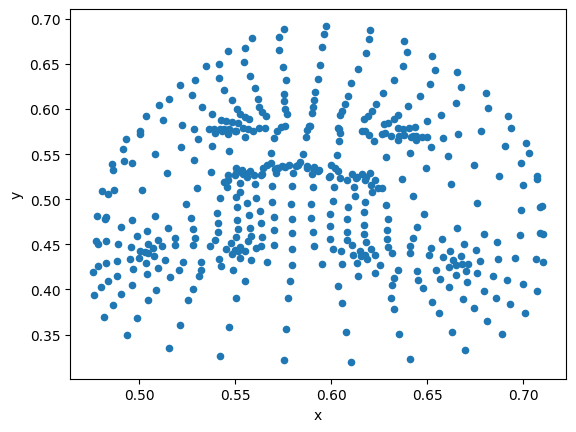

In [22]:
landmarks = -landmarks
landmarks.plot(x = 'x',y = 'y',kind='scatter')